In [1]:
from bokeh.io import output_notebook
from bokeh.models import BoxAnnotation
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from calc import evapotranspiration
from config import config
from data import combined_data, load_hourly, irrigation
from download import main as download
from plotting import plot_water_model
from model import Water
plt.rcParams["figure.figsize"] = (20, 5)
output_notebook()

Loading BokehJS ...

In [2]:
download(['config'])

1hour_Level2: 0 rows giving 0 observations, latest at 2021-07-23 08:00:01
1hour_Level2_maxmin: 0 rows giving 0 observations, latest at 2021-07-23 08:00:01
climat0900: 0 rows giving 0 observations, latest at 2021-07-22 09:00:01
climate_extract_cgi: 2 rows giving 0 observations, latest at 2021-07-22 09:00:01


In [3]:
annotations = [
    BoxAnnotation(left=pd.Timestamp('2021-05-03'), right=pd.Timestamp('2021-05-14'), 
                  fill_alpha=0.1, fill_color='red'),
    BoxAnnotation(left=pd.Timestamp('2021-06-19'), right=pd.Timestamp('2021-06-28'), 
                  fill_alpha=0.1, fill_color='green'),
]
plot_water_model(Water().run(irrigation=irrigation('house')), annotations, title='house')
plot_water_model(Water().run(irrigation=irrigation('terrace')), annotations, title='terrace')

<AxesSubplot:xlabel='timestamp'>

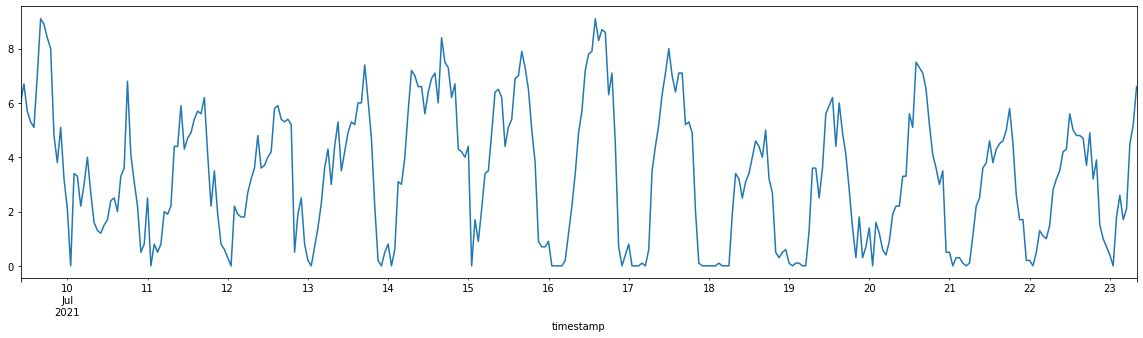

In [4]:
hourly = load_hourly()
hourly['U2run_der'].diff().clip(lower=0)[pd.Timestamp.now()-pd.Timedelta(14, 'D'):].plot()

In [5]:
data = combined_data()

<AxesSubplot:xlabel='timestamp'>

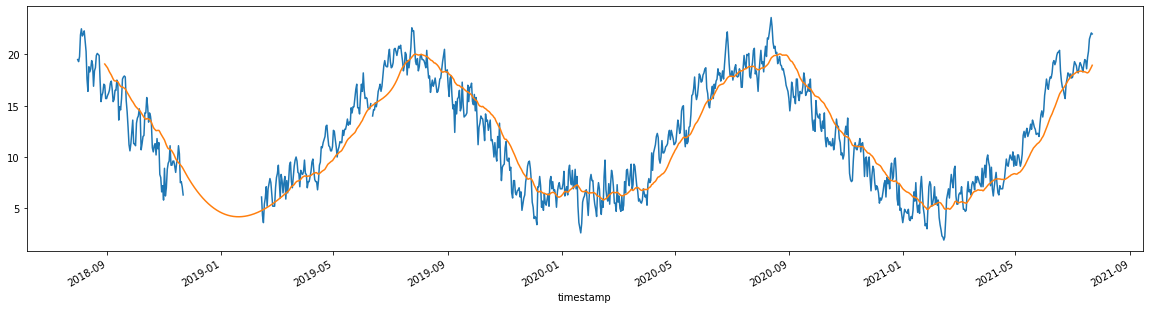

In [6]:
data['TSoil5_09'].plot()
data['TSoil5_09'].rolling(30).mean().interpolate(method='polynomial', order=3).plot()

<AxesSubplot:xlabel='timestamp'>

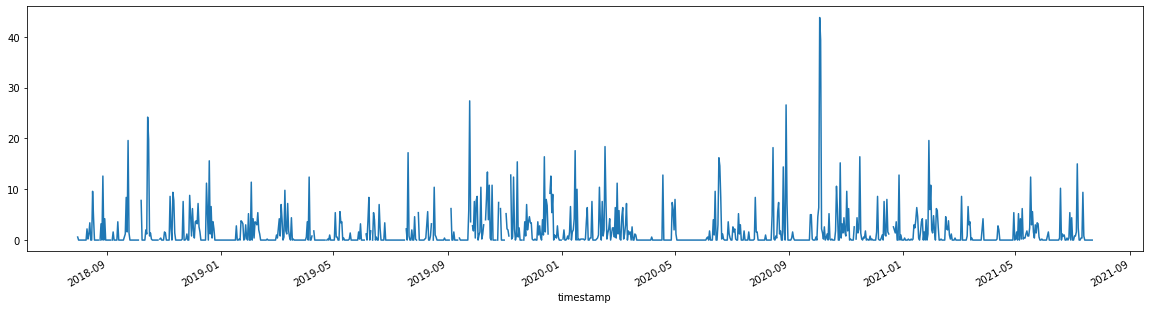

In [7]:
data['Rain_accum_0909'].plot()

<AxesSubplot:xlabel='timestamp'>

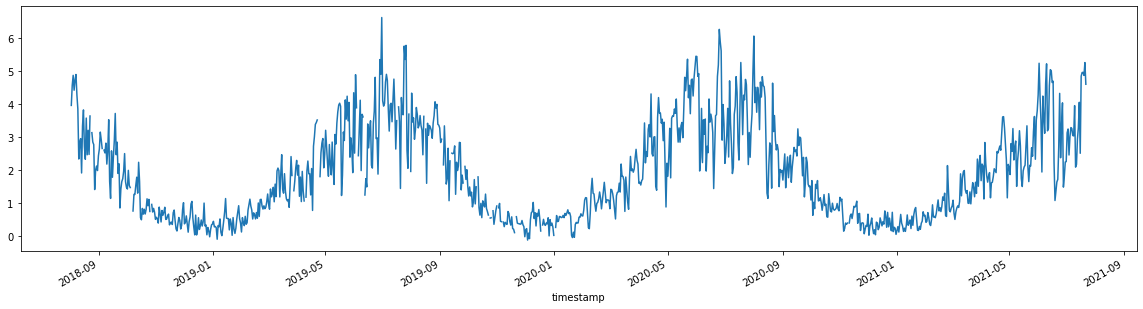

In [8]:
ET = evapotranspiration(data)
ET.plot()